***
# Wind Turbine Linear Regression.
***

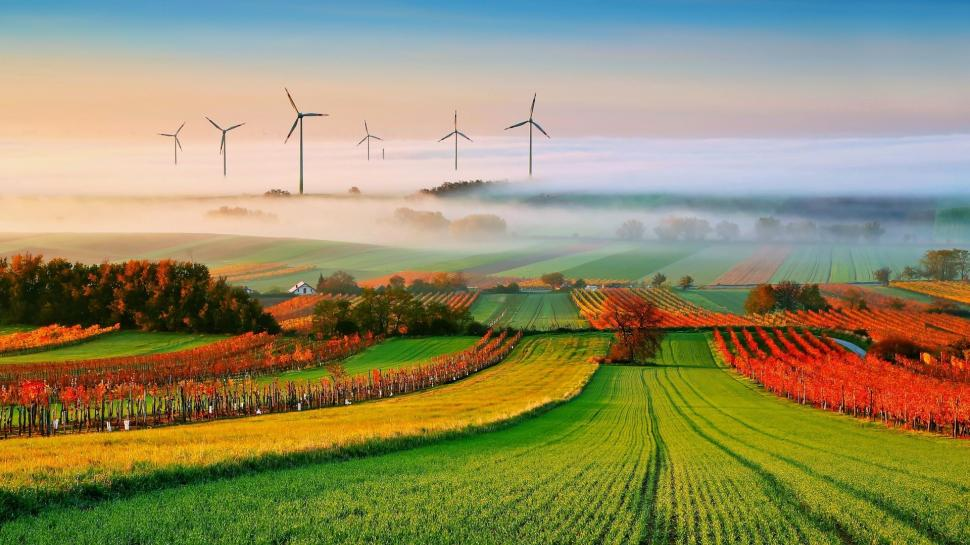

***
### Aim:
***

An investigation into various forms of linear regression applied to power curves of wind turbines in the hope of achieving the best possible fit to the data given.

***
##### Imports & Preferences:

In [22]:
# Numerical array and fitting lines:
import numpy as np

#Plots:
import matplotlib.pyplot as plt

# Dealing with Dataframes:
import pandas as pd

import seaborn as sns

# Machine learning:
import sklearn
from sklearn import linear_model

In [23]:
# Nicer plot style:
plt.style.use('ggplot')

# Bigger plots:
plt.rcParams['figure.figsize'] = (18,10)

***
#### Data:

In [24]:
# Import data
data = 'https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv'

df = pd.read_csv(data)
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


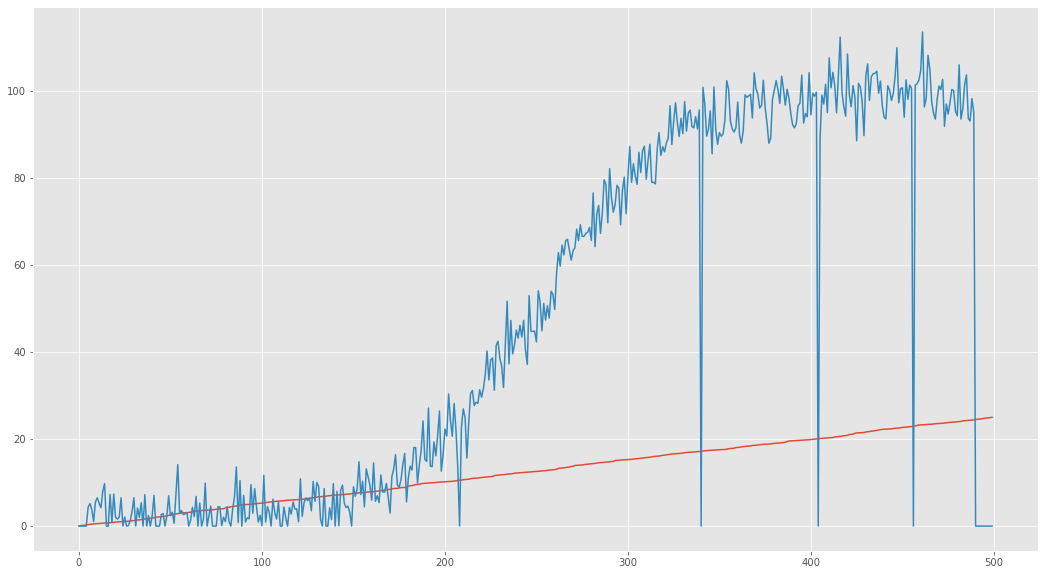

In [25]:
# Visualise Data:
plt.plot(df)

<function matplotlib.pyplot.legend(*args, **kwargs)>

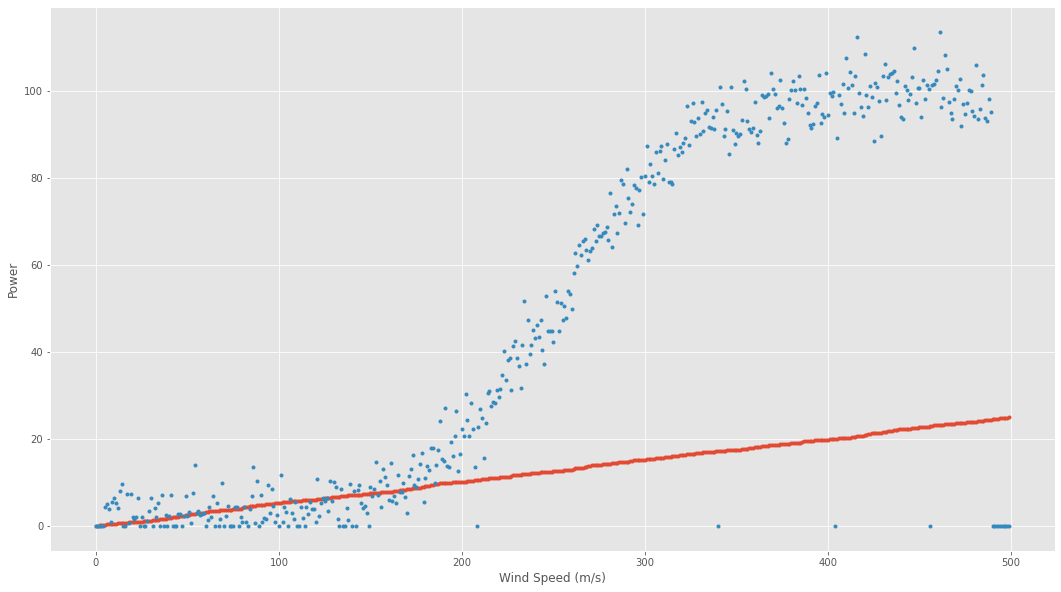

In [39]:
# Use dots instead:
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power')
plt.plot(df, '.')

Straight away we can see that the model is unsuitable for a simple linear regression model. The dots do not seem to follow a singular straight linear slope, meaning large parts of the data would be totally misrepresented by the general average in terms of a simple linear model.

As a result, it is apparent early on that a different form of linear regression would be more suitable.

That said, let's give it a go to see what our result may be:

In [50]:
# Find coefficients:
coeffs = np.polyfit(df['power'], df['speed'], 1)
coeffs

array([0.14823017, 5.4731882 ])

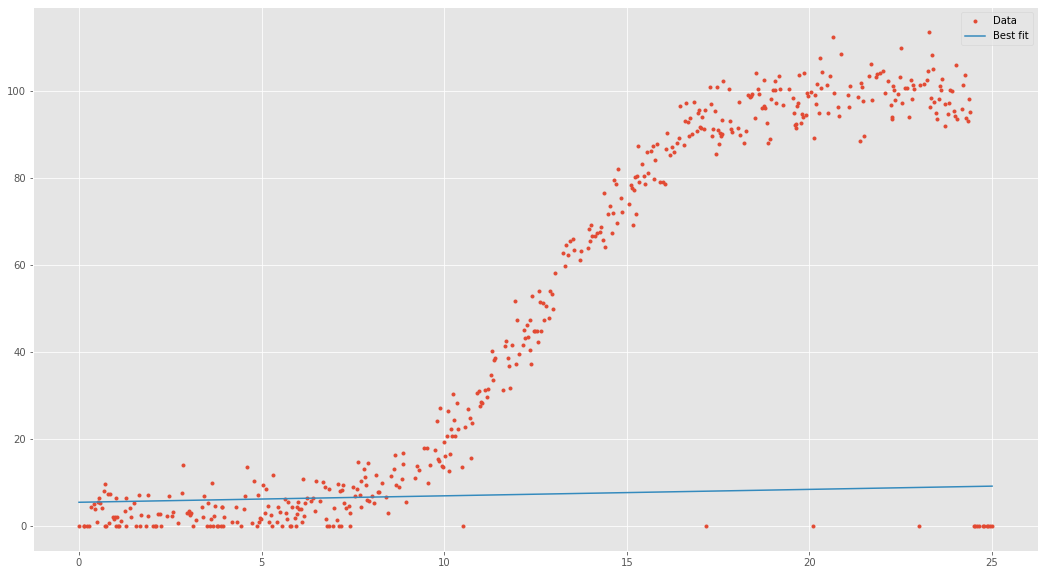

In [54]:
# Treat power data as x 
plt.plot(df['speed'], df['power'], '.', label='Data')
plt.plot(df['speed'], coeffs[0] * df['speed'] + coeffs[1], '-', label='Best fit')
plt.legend();

In [71]:
# Calculate cost of line:
cost1 = lambda m,c: np.sum([(df['speed'][i] - m * df['power'][i] - c)**2 for i in range(df['power'].size)])

In [72]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.14823017, 5.4731882, cost1(0.14823017, 5.4731882)))

Cost with m =  0.15 and c =  5.47:  7060.69


When writing out the above code, I accidentally inverted the axis when inputting the equation. Funnily enough, but for reasons I do not fully understand yet, the line appears to be a much better fit. It still is far from perfect, but I thought it was worth noting...

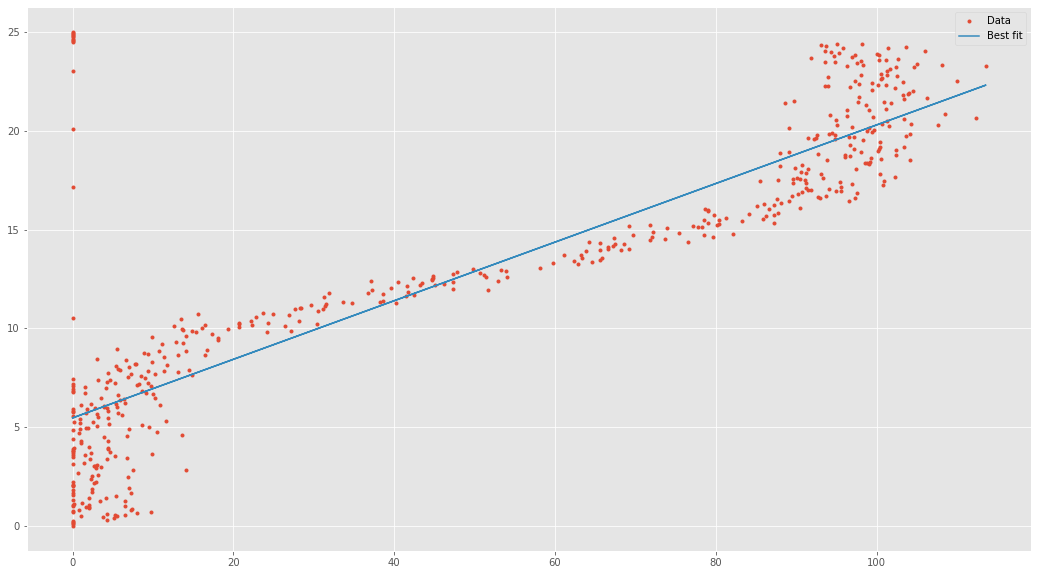

In [57]:
# Treat power data as x 
plt.plot(df['power'], df['speed'], '.', label='Data')
plt.plot(df['power'], coeffs[0] * df['power'] + coeffs[1], '-', label='Best fit')
plt.legend();

In [68]:
# Calculate the cost of the line:
cost2 = lambda m,c: np.sum([(df['power'][i] - m * df['speed'][i] - c)**2 for i in range(df['speed'].size)])

In [73]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.14823017, 5.4731882, cost2(0.14823017, 5.4731882)))

Cost with m =  0.15 and c =  5.47: 1653984.80


Here we can see that the cost of the second line is actually far higher, which shows that even though the line appears to be fitting the shape of the curve beeter than the first one, the calculated overall cost is actually far higher. This must be due to the fact that the first line at least does a good job of fitting to aportion of the plot before it goes astray, whereas the second line pretty much misrepresents every dot on the graph equally.
***